In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


In [91]:
df = pd.read_csv('threads_reviews.csv')

In [92]:
df.head()

,source,review_description,rating,review_date
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43


In [93]:
df.shape

(32910, 4)

In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32910 entries, 0 to 32909
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   source              32910 non-null  object
 1   review_description  32910 non-null  object
 2   rating              32910 non-null  int64 
 3   review_date         32910 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.0+ MB


In [95]:
df.isnull().sum()

source                0
review_description    0
rating                0
review_date           0
dtype: int64

In [96]:
df.duplicated().sum()

1

In [97]:
df.drop_duplicates(keep = "first",inplace = True)
df.duplicated().sum()

0

## **Data Visualization**

### Distribution of Ratings

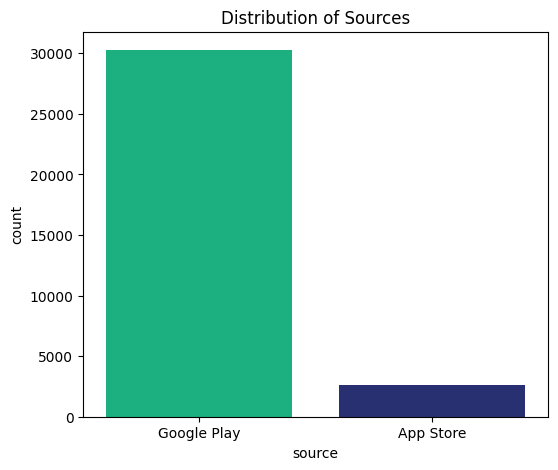

In [98]:
plt.figure(figsize=(6, 5))
sns.countplot(x='source', data=df, palette = ["#03C988","#1D267D"], order=df['source'].value_counts().index)
plt.title('Distribution of Sources')
plt.show()

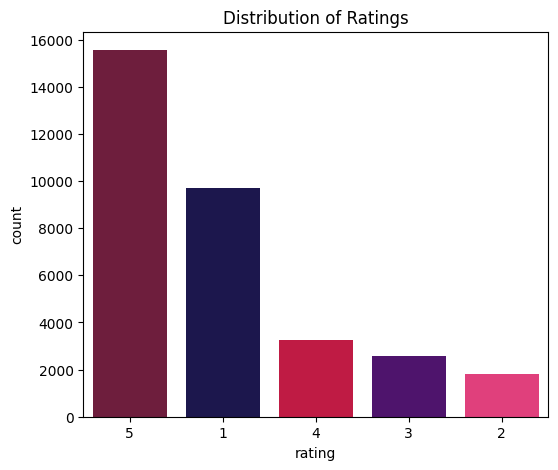

In [99]:
plt.figure(figsize=(6, 5))
sns.countplot(x='rating', data=df, palette=["#7B113A", "#150E56", "#DA0037", "#52057B", "#FB2576"], order=df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.show()

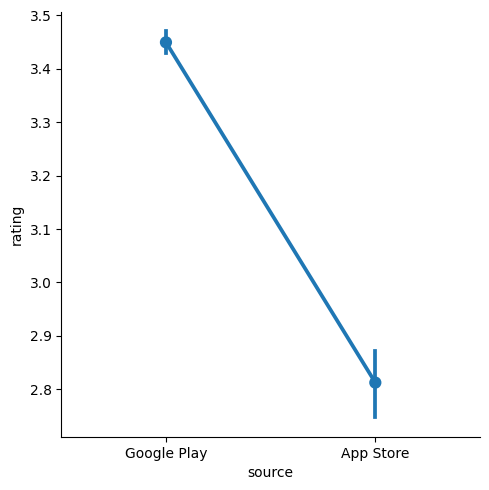

In [100]:
sns.catplot(data = df, x = "source",y = "rating",kind = "point")

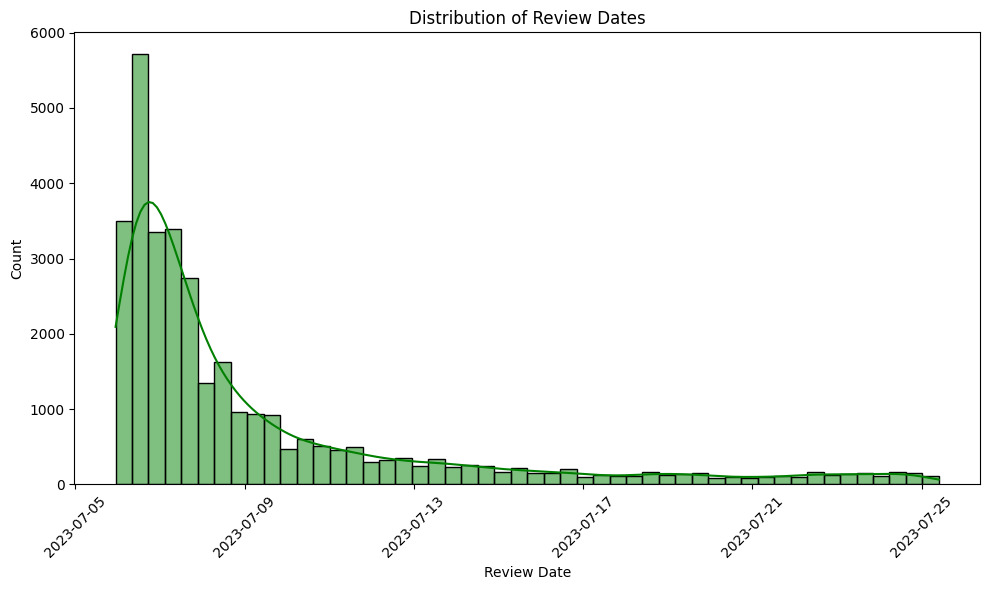

In [101]:
df['review_date'] = pd.to_datetime(df['review_date'])
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='review_date',color='green', bins=50, kde=True)
plt.title('Distribution of Review Dates')
plt.xlabel('Review Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### **Word Cloud of Reviews**

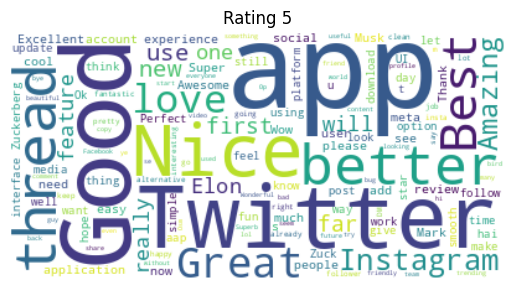

In [102]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='white').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud(5)


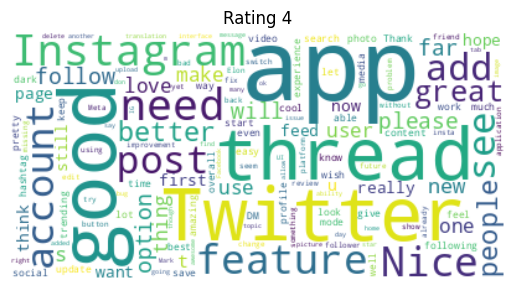

In [103]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='white').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud(4)

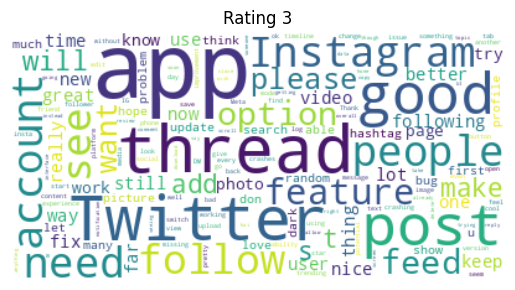

In [104]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='white').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud(3)

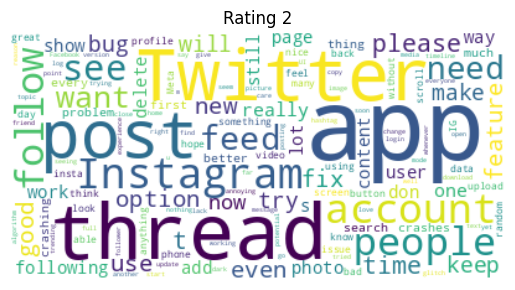

In [105]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='white').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud(2)

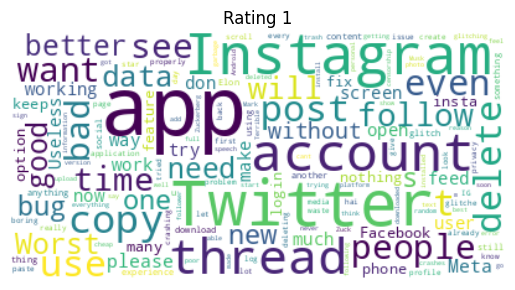

In [106]:
from wordcloud import WordCloud

def create_cloud(data):
    text = df[df['rating']==data]
    text_cloud = ' '.join(txt for txt in text['review_description'])
    word_cloud = WordCloud(collocations=False,background_color='white').generate(text_cloud)
    plt.imshow(word_cloud,interpolation='bilinear')
    plt.title(f'Rating {data}')
    plt.axis('off')

create_cloud(1)

### **Cleaning Text**

In [107]:
!pip install emoji

In [108]:
import string
import emoji
import re
def cleaning_text(text):
    text = text.lower()
    text = re.sub(r'\d+','',text)
    text = emoji.demojize(text)
    text = ''.join([i for i in text if i not in string.punctuation])
    return text
df['new_review'] = df['review_description'].apply(cleaning_text)

In [109]:
df.head()

,source,review_description,rating,review_date,new_review
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,meh not the greatest experience on a chromeboo...
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,pretty good for a first launch its easy to use...
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,for a brand new app its very well optimized ho...
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,great app with a lot of potential however ther...
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,the app is good but it needs a lot of function...


### **Stemming for finding word root**

In [110]:
!pip install nltk

In [111]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = word_tokenize(df['new_review'].iloc[5])
for w in words:
    print(w, ':', ps.stem(w))

currently : current
its : it
very : veri
challenging : challeng
to : to
use : use
its : it
in : in
dark : dark
mode : mode
and : and
i : i
want : want
to : to
change : chang
it : it
to : to
brighten : brighten
it : it
up : up
but : but
apparently : appar
i : i
can : can
only : onli
change : chang
it : it
through : through
instagram : instagram
why : whi
dark : dark
mode : mode
needs : need
to : to
be : be
improved : improv
its : it
tough : tough
on : on
the : the
eyes : eye
and : and
the : the
ui : ui
is : is
visually : visual
unbearable : unbear
twitter : twitter
nearly : nearli
perfected : perfect
the : the
ui : ui
i : i
think : think
its : it
a : a
decent : decent
start : start
but : but
i : i
cant : cant
use : use
it : it
for : for
more : more
than : than
a : a
couple : coupl
of : of
seconds : second
even : even
if : if
i : i
wanted : want
to : to


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [112]:

nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [113]:
stemmed = []
for i in range(len(df)):
    stem_list = []
    words = word_tokenize(df['new_review'].iloc[i])
    for w in words:
        stem_list.append(ps.stem(w))
    stemmed.append(stem_list)

df['Stemmed'] = stemmed
df['Stemmed'] = df['Stemmed'].apply(' '.join)

In [114]:
from textblob import TextBlob
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Stemmed"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

In [115]:
df[["subjectivity", "polarity"]] = df.apply(sentiment_analysis, axis=1)
df.head()

,source,review_description,rating,review_date,new_review,Stemmed,subjectivity,polarity
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,meh not the greatest experience on a chromeboo...,meh not the greatest experi on a chromebook se...,0.591667,0.145000
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,pretty good for a first launch its easy to use...,pretti good for a first launch it easi to use ...,0.447619,0.330357
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,for a brand new app its very well optimized ho...,for a brand new app it veri well optim howev i...,0.574527,0.082670
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,great app with a lot of potential however ther...,great app with a lot of potenti howev there is...,0.237500,0.200000
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,the app is good but it needs a lot of function...,the app is good but it need a lot of function ...,0.544167,0.250833


### **Sentiment Analysis**

In [116]:
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"

In [117]:
df["sentiment_analysis"] = df["polarity"].apply(analysis)
df.head()

,source,review_description,rating,review_date,new_review,Stemmed,subjectivity,polarity,sentiment_analysis
0,Google Play,Meh. Not the greatest experience on a Chromebo...,2,2023-07-08 14:18:24,meh not the greatest experience on a chromeboo...,meh not the greatest experi on a chromebook se...,0.591667,0.145000,Positive
1,Google Play,Pretty good for a first launch!! Its easy to u...,3,2023-07-19 20:52:48,pretty good for a first launch its easy to use...,pretti good for a first launch it easi to use ...,0.447619,0.330357,Positive
2,Google Play,"For a brand new app, it's very well optimized....",3,2023-07-06 23:03:11,for a brand new app its very well optimized ho...,for a brand new app it veri well optim howev i...,0.574527,0.082670,Positive
3,Google Play,"Great app with a lot of potential! However, th...",3,2023-07-10 00:53:25,great app with a lot of potential however ther...,great app with a lot of potenti howev there is...,0.237500,0.200000,Positive
4,Google Play,"The app is good, but it needs a lot of functio...",3,2023-07-06 16:57:43,the app is good but it needs a lot of function...,the app is good but it need a lot of function ...,0.544167,0.250833,Positive


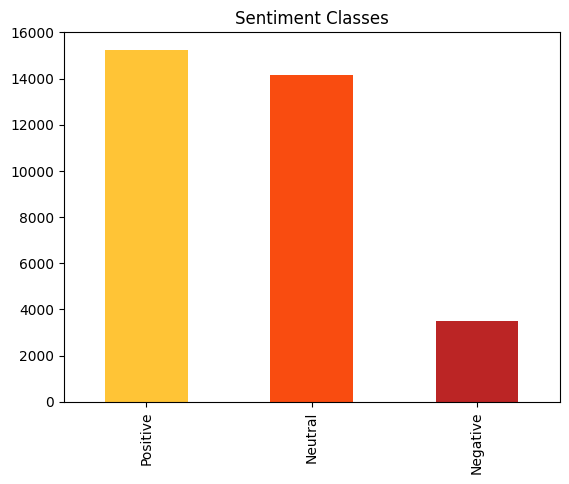

In [118]:
df.sentiment_analysis.value_counts().plot(kind='bar', color=["#FFC436","#F94C10","#BB2525"])
plt.title('Sentiment Classes')
plt.show()

Text(0, 0.5, 'Subjectivity')

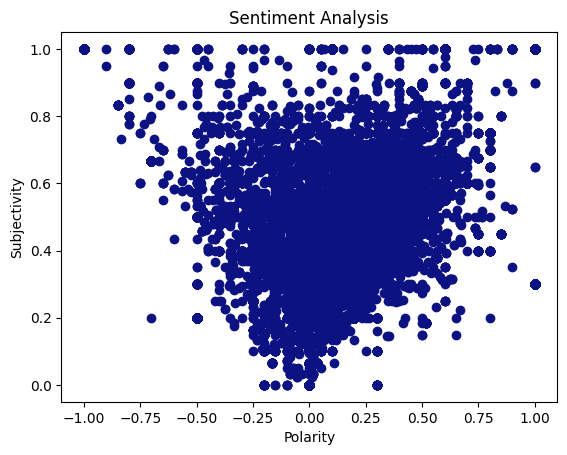

In [119]:
plt.scatter(df.polarity, df.subjectivity, color='#0D1282')
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')